In [2]:
"""
An implementation of the Grover's algorithm 

Finds the state <11|
"""

"\nAn implementation of the Grover's algorithm \n\nFinds the state <11|\n"

In [3]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.visualization import plot_histogram

In [4]:
#number of qubits in the circuit
n = 2
grover_circuit = QuantumCircuit(n)

In [5]:
def initialize_s(qc, qubits):
  """Apply an H gate to qubits in qc"""
  for q in qubits:
    qc.h(q)
  return qc

In [6]:
grover_circuit = initialize_s(grover_circuit, [0, 1])
grover_circuit.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [7]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [8]:
#Diffusion operator (U_s)
grover_circuit.h([0, 1])
grover_circuit.z([0, 1])
grover_circuit.cz(0, 1)
grover_circuit.h([0, 1])
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

In [9]:
#Running on simulator

#Obtain simulator object
sim = Aer.get_backend('aer_simulator')

#we need to make a copy of the circuit with 'save_statevector'
#instruction to run the Aer simulator
grover_circuit_sim = grover_circuit.copy()

grover_circuit_sim.save_statevector()

qobj = assemble(grover_circuit_sim)

result = sim.run(qobj).result()

statevec = result.get_statevector()

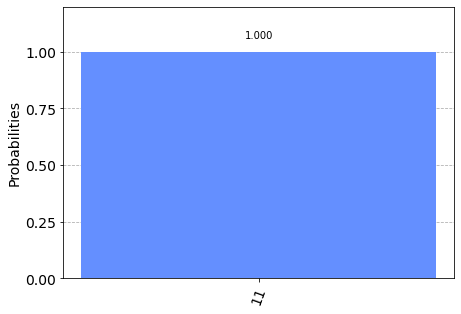

In [10]:
#measure all qubits
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()

#PLot histogram of all states
plot_histogram(counts)

In [11]:
#Running on real device

# Load IBM Q account and get the least busy backend device

token = 'db03f58cc9cf2e79a1511ba83d4055ca75ef81ac43db9b3f356f76e15677c1261f15787a2abea299dbc42614fdfd937e6afa69922349ccfd5df68ac4bb2cc159'
IBMQ.save_account(token)
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))

print("Running on current least busy device: ", device)

configrc.store_credentials:WARNING:2022-04-07 11:11:19,414: Credentials already present. Set overwrite=True to overwrite.


Running on current least busy device:  ibmq_santiago


In [12]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue

transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


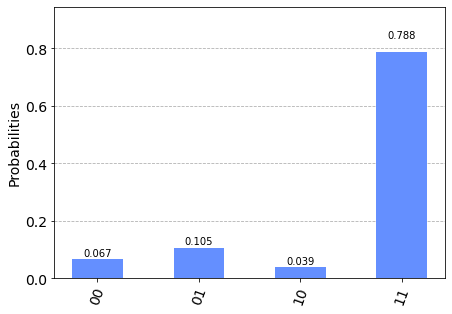

In [13]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)